<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <!-- Left Column: Image -->
  <div style="flex: 1; text-align: center;">
    <img src="https://i0.wp.com/cdcs.web.ua.pt/wp-content/uploads/2022/05/cropped-cropped-Picture13-1.png?w=968" width="370" height="200" style="display: block; margin: auto;"/>
  </div>

  <!-- Right Column: Text -->
  <div style="flex: 1; text-align: left;">
    <div><strong style="color: #4F5B63; font-size: 1.5em;">Master in Data Science for Social Sciences</strong></div>
    <div><strong style="color: #4F5B63; font-size: 1.2em;">University of Aveiro</strong></div>
    <p style="color: #46627F; font-weight: bold; font-style: italic;">Introduction to Data Science - 2024/2025</p>
    <p style="color: #4F5B63;"></p>
    <p style="color: #4F5B63;"></p>
  </div>
</div>

<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h2><h1 style="text-align: center; font-size: 2em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;"> O Papel da Ciência de Dados nos Avanços dos Cuidados de Saúde</h1>
<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> -Notebook Análise Bibliométrica- </h1></h2>
      </div>
</div>

## Trabalho ICD
Realizado por: Beatriz Martins (Nº Mec 102756) e Bruna Simões (Nº Mec 103427)

<h1>Library</h1>

In [38]:
import streamlit as st
import pandas as pd
import numpy as np
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import plotly.express as px
from geopy.geocoders import Nominatim
import time
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

<h1>Dados</h1>

In [4]:
df= pd.read_csv("scopus (6).csv")

In [7]:
df.head
df.info
df.describe

<bound method NDFrame.describe of                                                 Authors  \
0                      Tyagi A.K.; Kumari S.; Tiwari S.   
1     Echefu G.; Shah R.; Sanchez Z.; Rickards J.; B...   
2     Petrušić I.; Ha W.-S.; Labastida-Ramirez A.; M...   
3     Chu Y.-C.; Chen S.S.-S.; Chen K.-B.; Sun J.-S....   
4             Muthamizh S.; Balachandran S.; Dilipan E.   
...                                                 ...   
9336    Koompairojn S.; Hua K.; Hua K.A.; Srisomboon J.   
9337  You Y.; Bai L.; Xue T.; Zhong C.; Liu Z.; Tian J.   
9338                                                NaN   
9339                    Schulze F.; Major D.; Bühler K.   
9340                             Del Fiol G.; Haug P.J.   

                                      Author full names  \
0     Tyagi, Amit Kumar (58100922500); Kumari, Shabn...   
1     Echefu, Gift (58085293100); Shah, Rushabh (593...   
2     Petrušić, Igor (6603217257); Ha, Woo-Seok (572...   
3     Chu, Yuan-Chia 

#QUANTOS NAS EM CADA VARIÁVEL?
missing_values_per_column = df.isna().sum()
print("Valores ausentes por coluna:\n", missing_values_per_column)


In [11]:
variaveis = df.columns.tolist()
print(variaveis)

['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts', 'References', 'Correspondence Address', 'Editors', 'Publisher', 'Sponsors', 'Conference name', 'Conference date', 'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document', 'Abbreviated Source Title', 'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID']


<h1>Visualização Dados</h1>

In [72]:
df.head(3)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Tyagi A.K.; Kumari S.; Tiwari S.,"Tyagi, Amit Kumar (58100922500); Kumari, Shabn...",58100922500; 57219411676; 57197202543,Blockchain for Internet of Things and Machine ...,2025,Artificial Intelligence-Enabled Digital Twin f...,NaN,NaN,NaN,179,...,978-139430360-1; 978-139430357-1,NaN,NaN,English,Artificial Intelligence-Enabled Digital Twin f...,Book chapter,Final,NaN,Scopus,2-s2.0-85206645392
1,Echefu G.; Shah R.; Sanchez Z.; Rickards J.; B...,"Echefu, Gift (58085293100); Shah, Rushabh (593...",58085293100; 59397142400; 59397142500; 5939649...,Artificial intelligence: Applications in cardi...,2024,American Heart Journal Plus: Cardiology Resear...,48,NaN,100479,NaN,...,NaN,NaN,NaN,English,Am. Heart J. Plus,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85208259395
2,Petrušić I.; Ha W.-S.; Labastida-Ramirez A.; M...,"Petrušić, Igor (6603217257); Ha, Woo-Seok (572...",6603217257; 57218557872; 57194169670; 55425531...,Influence of next-generation artificial intell...,2024,Journal of Headache and Pain,25,1,151,NaN,...,NaN,JHPOA,39272003.0,English,J. Headache Pain,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85204010100


<h1> Parte I: Análise Bibliométrica </h1>

## Part 1: How Many?
Nesta secção vamos analisar a contagem de: Nº artigos, citações, autores e outras métricas.

In [15]:
# TOTAL DE ARTIGOS: 
total_articles = len(df)
print("Total de Artigos:", total_articles)

#9341 artigos no total

Total de Artigos: 9341


In [20]:
# TOP 10 ARTIGOS MAIS CITADOS:
top_cited_articles = df[['Title', 'Cited by']].sort_values(by='Cited by', ascending=False).head(10)
print("Top 10 Most Cited Articles:")
print(top_cited_articles)


Top 10 Most Cited Articles:
                                                  Title  Cited by
6315  Machine Learning: Algorithms, Real-World Appli...      2177
8218                       Machine learning in medicine      1907
9102  Model inversion attacks that exploit confidenc...      1859
8280  An overview of deep learning in medical imagin...      1353
7036  The future of digital health with federated le...      1190
9321  Machine learning for medical diagnosis: Histor...      1185
3250  ChatGPT Utility in Healthcare Education, Resea...      1033
8138                   The "all of us" research program       978
9098  Deep learning in medical imaging: General over...       919
8091  Artificial intelligence in digital pathology —...       872


In [26]:
#AUTORES MAIS PRODUTIVOS:
author_counts = df['Authors'].str.split(', ').explode().value_counts().head(10)
print("Top 10 Most Productives Authors:")
print(author_counts)

Top 10 Most Productives Authors:
Authors
Jr.                                                      7
Kaur J.                                                  4
III                                                      4
Panagoulias D.P.; Sotiropoulos D.N.; Tsihrintzis G.A.    4
Neri C.                                                  4
Shah S.J.                                                4
Wanjari M.; Mittal G.; Prasad R.                         3
Singh G.; Guleria K.; Sharma S.                          3
Motwani A.; Shukla P.K.; Pawar M.                        3
Prasetyo S.Y.                                            3
Name: count, dtype: int64


In [27]:
# CONTAGEM DO TIPO DE DOCUMENTO:
document_types = df['Document Type'].value_counts()
print("Distribuição dos Tipos de Documentos:\n", document_types)

#Mais predominante - artigo (3897)

Distribuição dos Tipos de Documentos:
 Document Type
Article              3897
Review               1952
Conference paper     1906
Book chapter          566
Editorial             470
Note                  223
Letter                113
Book                   86
Conference review      60
Short survey           49
Retracted              10
Erratum                 9
Name: count, dtype: int64


In [36]:
# CONTAGEM DE ARTIGOS COM OPEN ACCESS OR CLOSE ACCESS:
open_access_counts = df['Open Access'].value_counts()
print("Distribuição de Acesso Aberto vs. Fechado:\n", open_access_counts)


Distribuição de Acesso Aberto vs. Fechado:
 Open Access
All Open Access; Gold Open Access                              2062
All Open Access; Gold Open Access; Green Open Access            756
All Open Access; Green Open Access                              679
All Open Access; Hybrid Gold Open Access                        657
All Open Access; Bronze Open Access                             549
All Open Access; Green Open Access; Hybrid Gold Open Access     134
All Open Access; Bronze Open Access; Green Open Access          112
All Open Access                                                   1
Name: count, dtype: int64


In [40]:
# GRÁFICO COM OPEN ACCESS VS NON-OPEN ACCESS:
plt.figure(figsize=(8, 6))
open_access_counts.plot(kind='bar')


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_18428\3124232437.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [92]:
print(open_access_counts.head())


Open Access
All Open Access; Gold Open Access                       2062
All Open Access; Gold Open Access; Green Open Access     756
All Open Access; Green Open Access                       679
All Open Access; Hybrid Gold Open Access                 657
All Open Access; Bronze Open Access                      549
Name: count, dtype: int64


## Part 2: When?
Esta parte focará nos aspetos temporais, analisando tendências ao longo do tempo.
Por exemplo, examinar quantos artigos foram publicados a cada ano.

In [94]:
df['Year']

0       2025
1       2024
2       2024
3       2024
4       2024
        ... 
9336    2010
9337    2011
9338    1997
9339    2011
9340    2008
Name: Year, Length: 9341, dtype: int64

In [110]:
# CONTAGEM DE PUBLICAÇÕES POR ANO: 
publications_per_year = df['Year'].value_counts().sort_index()
print("Publicações por Ano:\n", publications_per_year)

# Ano com maior nº de publicações corresponde 2024 com 2371 publicações.

Publicações por Ano:
 Year
1997       1
1999       1
2001       1
2002       1
2005       1
2006       2
2007       4
2008       3
2009       6
2010       7
2011      18
2012       8
2013      25
2014      38
2015      68
2016     110
2017     203
2018     332
2019     570
2020     940
2021    1221
2022    1431
2023    1956
2024    2371
2025      23
Name: count, dtype: int64


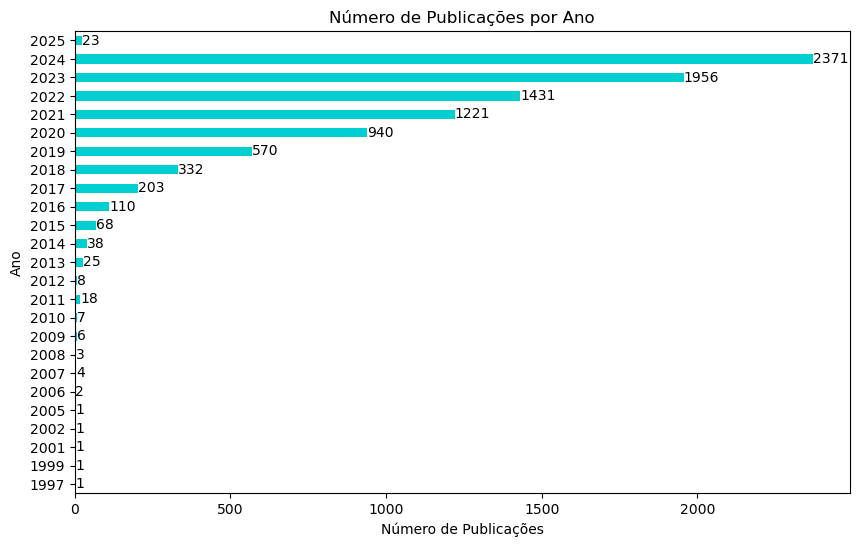

In [115]:
# GRÁFICO COM Nº DE PUBLICAÇÕES POR ANO:

# Ativar visualização para gráficos no Jupyter Notebook
%matplotlib inline
# Criar a variável yearly_publications
yearly_publications = df['Year'].value_counts().sort_index()
cor_pastel_escuro = '#00CED1'
plt.figure(figsize=(10, 6))
ax = yearly_publications.plot(kind='barh', color=cor_pastel_escuro, title='Número de Publicações por Ano')
plt.xlabel("Número de Publicações")
plt.ylabel("Ano")
ax.bar_label(ax.containers[0])
plt.show()


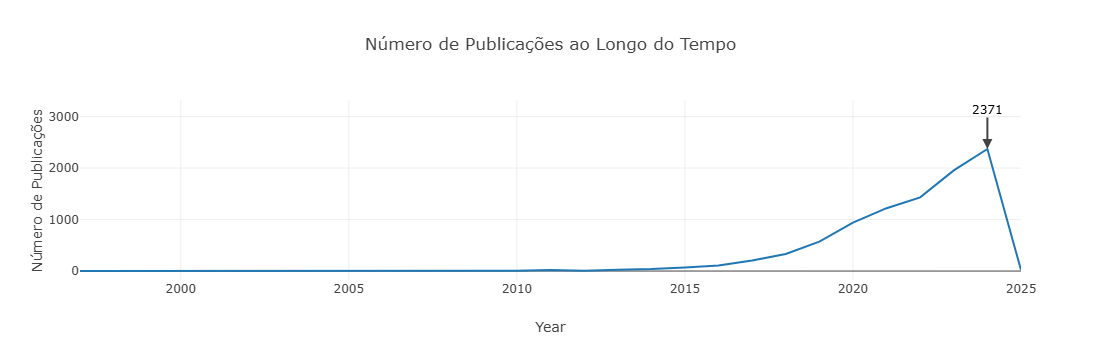

In [129]:
#GRÁFICO Nº PUBLICAÇÕES AO LONGO DO TEMPO:

df_soma_por_ano = df.groupby('Year').size().reset_index(name='Número de Publicações')
ano_pico = df_soma_por_ano['Year'][df_soma_por_ano['Número de Publicações'].idxmax()]
publicacoes_pico = df_soma_por_ano['Número de Publicações'].max()
fig = px.line(df_soma_por_ano, x='Year', y='Número de Publicações', title='Número de Publicações ao Longo do Tempo')
fig.update_traces(line=dict(color='#1f77b4'))  # Azul escuro
fig.add_annotation(
    x=ano_pico,
    y=publicacoes_pico,
    text=f"{publicacoes_pico}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="black")
)
fig.show()


In [135]:
# SOMATÓRIO DE CITAÇÕES POR ANO:
citations_per_year = df.groupby('Year')['Cited by'].sum().sort_index()
print("Citações por Ano:\n", citations_per_year)

#Ano 2020 com mais citações (=29324)

Citações por Ano:
 Year
1997        0
1999       59
2001     1185
2002       25
2005       16
2006       93
2007       48
2008       64
2009      172
2010      132
2011      360
2012      226
2013     1222
2014     1776
2015     3786
2016     6156
2017    12427
2018    20449
2019    26804
2020    29324
2021    27585
2022    17798
2023    12230
2024     2460
2025        0
Name: Cited by, dtype: int64


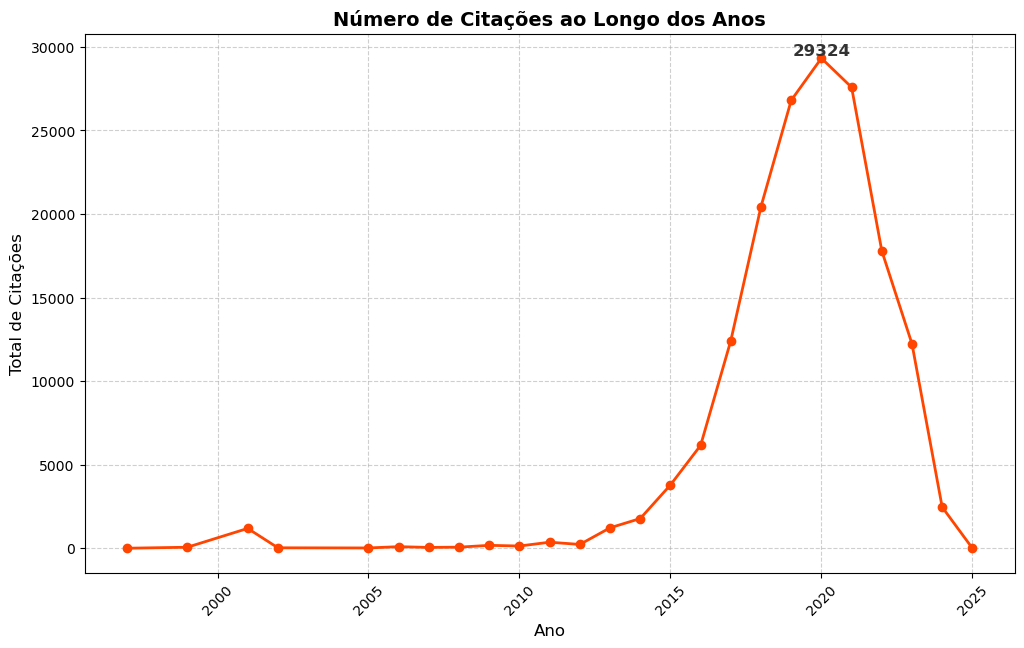

In [137]:
#GRÁFICO COM Nº CITAÇÕES AO LONGO DOS ANOS:

citations_per_year = df.groupby('Year')['Cited by'].sum()
ano_pico = citations_per_year.idxmax()
citações_pico = citations_per_year.max()
plt.figure(figsize=(12, 7))
citations_per_year.plot(
    kind='line',
    marker='o',
    color='#FF4500',  
    linestyle='-',    
    linewidth=2,   
    title='Total de Citações por Ano'
)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Citações", fontsize=12)
plt.title("Número de Citações ao Longo dos Anos", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)
plt.text(ano_pico, citações_pico, f"{citações_pico}", ha='center', va='bottom', fontsize=12, color='#333333', fontweight='bold')
plt.show()



In [145]:
# TENDÊNCIA DE PUBLICAÇÕES COM OPEN ACCESS AO LONGO DOS ANOS:
open_access_trends = df[df['Open Access'] == 'All Open Access'].groupby('Year').size()
print("Tendência de Publicações de Acesso Aberto:\n", open_access_trends)


Tendência de Publicações de Acesso Aberto:
 Year
2020    1
dtype: int64


In [157]:
# Display unique values in 'Open Access' column to check for inconsistencies
print(df['Open Access'].unique())

[nan 'All Open Access; Gold Open Access'
 'All Open Access; Green Open Access'
 'All Open Access; Hybrid Gold Open Access'
 'All Open Access; Gold Open Access; Green Open Access'
 'All Open Access; Bronze Open Access'
 'All Open Access; Green Open Access; Hybrid Gold Open Access'
 'All Open Access; Bronze Open Access; Green Open Access'
 'All Open Access']


<Figure size 1200x700 with 0 Axes>

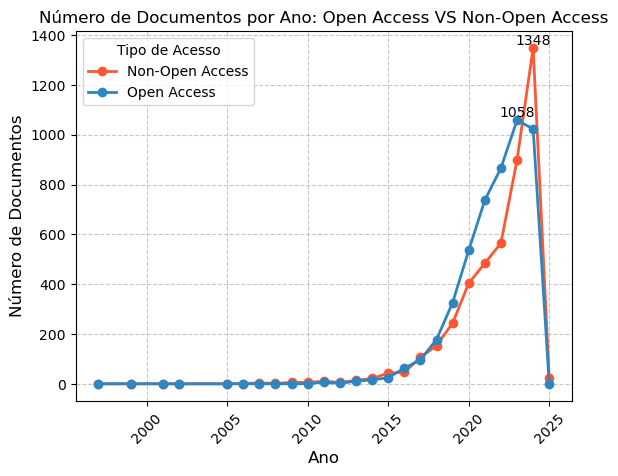

In [185]:
#GRÁFICO: Nº DOCUMENTOS POR ANO: OPEN ACCESS VS NON-OPEN ACCESS:

df_temp = df.copy()
df_temp['Open Access'] = df_temp['Open Access'].fillna('Not Open Access')
def simplify_open_access(value):
    if "All Open Access" in value:
        return "Open Access"
    else:
        return "Not Open Access"

df_temp['Open Access Simplified'] = df_temp['Open Access'].apply(simplify_open_access)
df_temp['Is Open Access'] = df_temp['Open Access Simplified'].apply(lambda x: 1 if x == 'Open Access' else 0)
documents_by_access = df_temp.groupby(['Year', 'Is Open Access']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 7))
ax = documents_by_access.plot(
    kind='line', 
    marker='o', 
    linestyle='-', 
    linewidth=2,
    color=['#FF5733', '#2E86C1'],  
    title='Número de Documentos por Ano: Open Access VS Non-Open Access'
)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Documentos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(["Non-Open Access", "Open Access"], title="Tipo de Acesso", fontsize=10)
for col in documents_by_access.columns:
    max_idx = documents_by_access[col].idxmax()  # Índice do valor máximo
    max_val = documents_by_access[col].max()     # Valor máximo
    plt.text(max_idx, max_val, f"{max_val}", ha='center', va='bottom', fontsize=10, color='black')
plt.show()


<Figure size 1200x700 with 0 Axes>

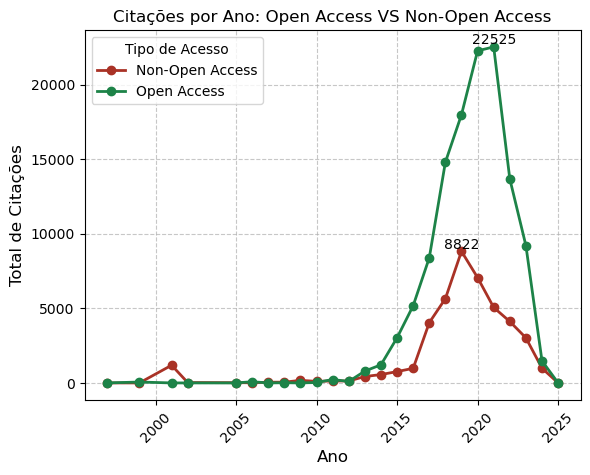

In [183]:
# GRÁFICO CITAÇÕES POR ANO: OPEN ACCESS VS NON-OPEN ACCESS:

df_temp = df.copy()
df_temp['Is Open Access'] = df_temp['Open Access'].notnull()
df_temp['Cited by'] = df_temp['Cited by'].fillna(0)
citations_by_access = df_temp.groupby(['Year', 'Is Open Access'])['Cited by'].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 7))
ax = citations_by_access.plot(
    kind='line', 
    marker='o', 
    linestyle='-', 
    linewidth=2,
    color=['#A93226', '#1D8348'],  
    title='Citações por Ano: Open Access VS Non-Open Access'
)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Citações", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)
plt.legend(["Non-Open Access", "Open Access"], title="Tipo de Acesso", fontsize=10)
for col in citations_by_access.columns:
    max_idx = citations_by_access[col].idxmax()  
    max_val = citations_by_access[col].max()     
    plt.text(max_idx, max_val, f"{max_val}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()


## Part 3: Where?
Esta seção examinará onde a pesquisa foi publicada, jornals, conferências e afiliações.

In [190]:
# TOP 10 MAIS CITADOS (JORNALS):
journal_citations = df.groupby('Source title')['Cited by'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Cited Journals:")
print(journal_citations)

Top 10 Most Cited Journals:
Source title
New England Journal of Medicine                                              3786
Artificial Intelligence in Medicine                                          3538
IEEE Access                                                                  3404
npj Digital Medicine                                                         2932
SN Computer Science                                                          2403
Nature Machine Intelligence                                                  2206
IEEE Journal of Biomedical and Health Informatics                            2116
Proceedings of the ACM Conference on Computer and Communications Security    1859
Journal of Biomedical Informatics                                            1784
Frontiers in Oncology                                                        1660
Name: Cited by, dtype: int64


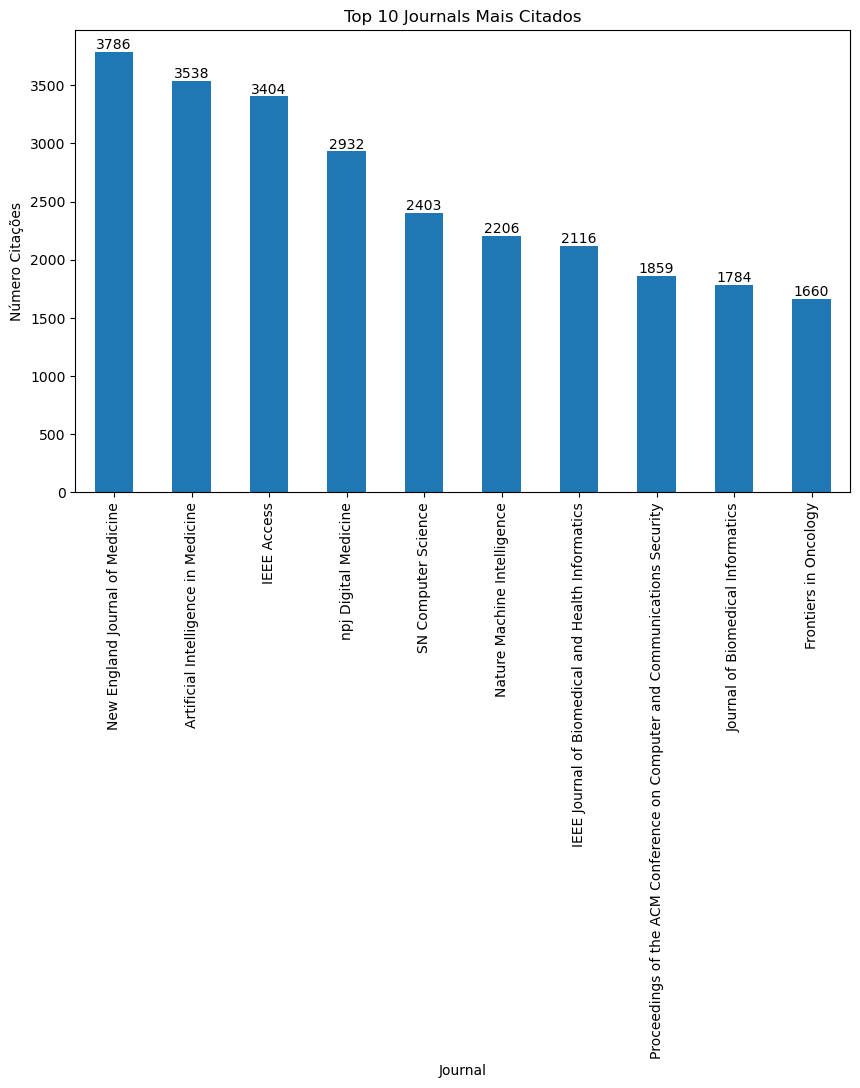

In [196]:
# GRÁFICO TOP 10 JORNALS MAIS CITADOS:

plt.figure(figsize=(10, 6))
ax = journal_citations.plot(kind='bar', title='Top 10 Journals Mais Citados')
plt.xlabel("Journal")
plt.ylabel("Número Citações")
ax.bar_label(ax.containers[0])
plt.show()

In [202]:
# INSTITUIÇÕES MAIS ATIVAS - COM MAIOR Nº PUBLICAÇÕES:
top_affiliations = df['Affiliations'].value_counts().head(10)
print("Top 10 Instituições com Mais Publicações:\n", top_affiliations)


Top 10 Instituições com Mais Publicações:
 Affiliations
Chitkara University Institute of Engineering and Technology, Chitkara University, Punjab, India                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              5
Department of CS & IT, Kalinga University, Raipur, India                                                                                                         

In [204]:
# DISTRIBUIÇÃO GEOGRÁFICA: 
nan_count = df['Conference location'].isna().sum()
print(f"Número de valores ausentes (NaN) em 'Conference location': {nan_count}")
geographic_distribution = df['Conference location'].value_counts(dropna=False).head(10)
print("Distribuição Geográfica de Pesquisa (Top 10 incluindo NaN):\n", geographic_distribution)


Número de valores ausentes (NaN) em 'Conference location': 7414
Distribuição Geográfica de Pesquisa (Top 10 incluindo NaN):
 Conference location
NaN                7414
Virtual, Online     144
Coimbatore           70
Chennai              44
Bangalore            43
Greater Noida        36
Pune                 28
Waikoloa             25
Raipur               25
Bengaluru            22
Name: count, dtype: int64


In [206]:
#CONFERÊNCIAS QUE SÃO MAIS FREQUENTES:
frequent_conferences = df['Conference name'].value_counts().head(10)
print("Conferências Mais Populares:\n", frequent_conferences)


Conferências Mais Populares:
 Conference name
1st International Conference on Artificial Intelligence for Innovations in Healthcare Industries, ICAIIHI 2023    17
2024 IEEE Winter Conference on Applications of Computer Vision, WACV 2024                                         13
23rd IEEE/CVF Winter Conference on Applications of Computer Vision, WACV 2023                                     11
2nd International Conference on Intelligent Cyber Physical Systems and Internet of Things, ICoICI 2024            10
14th International Conference on Computing Communication and Networking Technologies, ICCCNT 2023                  9
3rd IEEE International Conference on ICT in Business Industry and Government, ICTBIG 2023                          9
30th Medical Informatics Europe Conference, MIE 2020                                                               9
34th Medical Informatics Europe Conference, MIE 2024                                                               9
15th World Congres

In [210]:
# TOP 10 EDITORAS MAIS FREQUENTES:
top_publishers = df['Publisher'].value_counts().head(10)
print("Top 10 Editores:\n", top_publishers)


Top 10 Editores:
 Publisher
Institute of Electrical and Electronics Engineers Inc.    1396
Springer Science and Business Media Deutschland GmbH       584
Elsevier B.V.                                              355
Frontiers Media S.A.                                       315
Elsevier Ltd                                               301
Springer                                                   286
Oxford University Press                                    276
MDPI                                                       274
John Wiley and Sons Inc                                    250
Multidisciplinary Digital Publishing Institute (MDPI)      244
Name: count, dtype: int64


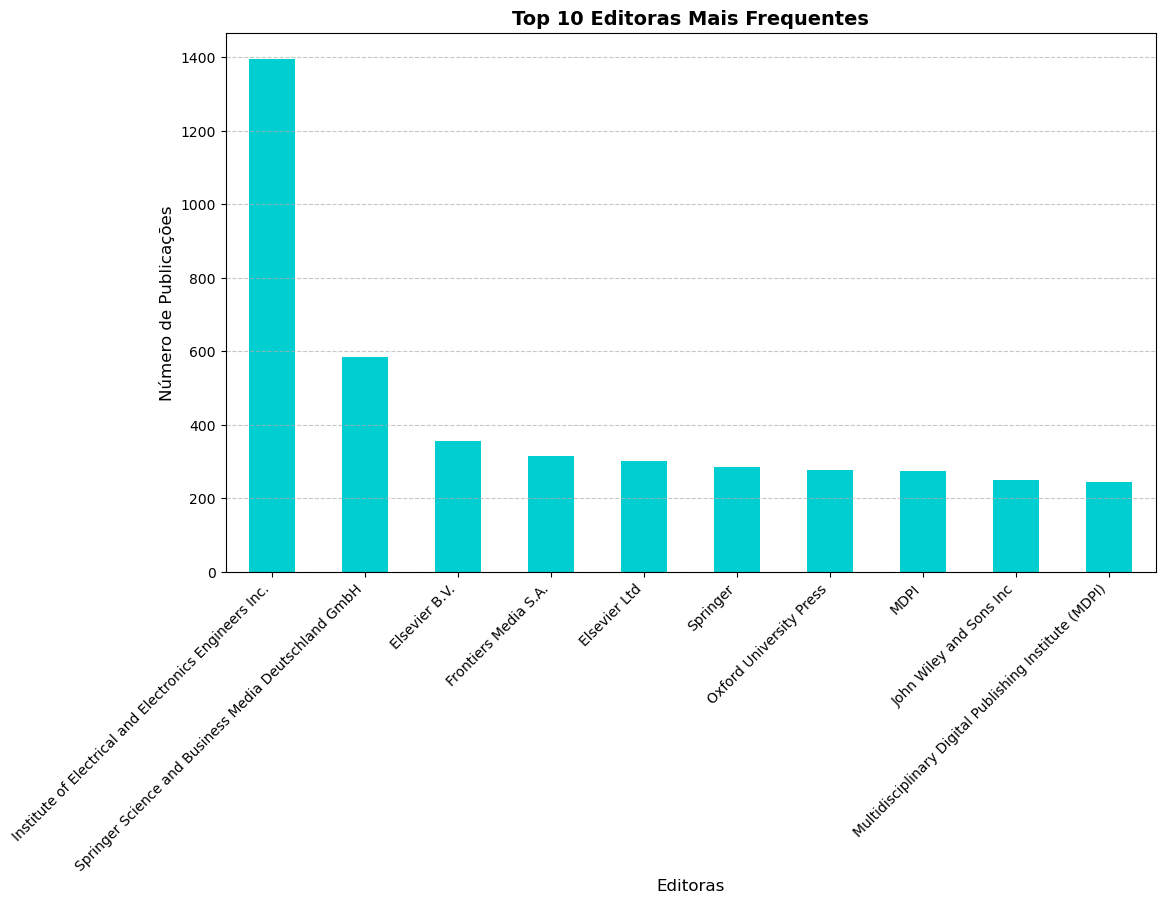

In [214]:
# GRÁFICO TOP 10 EDITORAS MAIS FREQUENTES:
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(12, 7))
top_publishers.plot(kind='bar', color='#00CED1')  
plt.title("Top 10 Editoras Mais Frequentes", fontsize=14, fontweight='bold')
plt.xlabel("Editoras", fontsize=12)
plt.ylabel("Número de Publicações", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


## Part 4: What?
Nesta seção final, objetivo é analisar os tópicos e temas da pesquisa, como keywords, abstract e fontes de financiamento.

In [228]:
#KEYWORDS MAIS COMUNS:
keywords = df['Author Keywords'].dropna().str.split(';').sum()
keywords_count = Counter(keywords)
top_keywords = pd.DataFrame(keywords_count.most_common(10), columns=['Keyword', 'Count'])
print("Top 10 Palavras-Chave dos Autores:\n", top_keywords)

#Temos aqui um problema em que basicamente temos a mesma keyword mas escrita de diferentes formas. Vamos corrigir as diferentes nomenclaturas
#e depois realizar o grafico.

Top 10 Palavras-Chave dos Autores:
                    Keyword  Count
0         Machine learning   1662
1         machine learning   1328
2  Artificial intelligence    747
3  artificial intelligence    550
4         Machine Learning    491
5            Deep learning    401
6               Healthcare    322
7       precision medicine    311
8       Precision medicine    305
9            deep learning    269


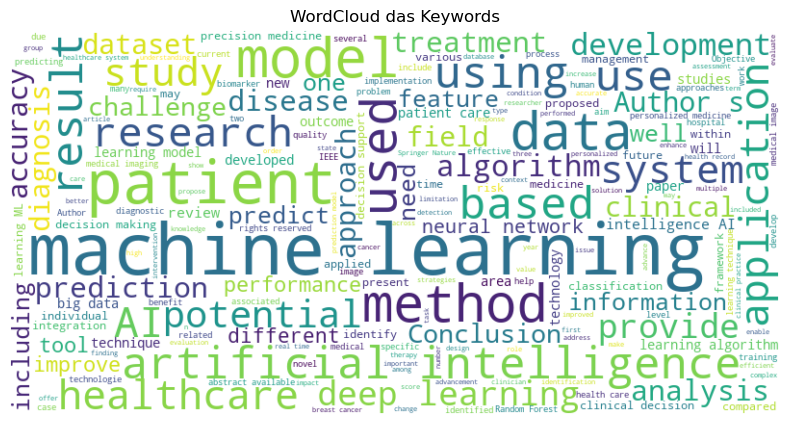

In [222]:
#GRÁFICO WORDCLOUD KEYWORDS:
all_abstracts = ' '.join(df['Abstract'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_abstracts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud das Keywords')
plt.show()

#Conseguimos ter uma ideia geral das principais keywords, suportando o que já tinhamos analisado anteriormente (no top 10 keywords).

In [232]:
#ALTERAR E JUNTAR AS MESMAS KEYWORDS COM A MESMA NOMENCLATURA:
keywords = df['Author Keywords'].dropna().str.lower().str.strip().str.split(';').sum()  # Converte para minúsculas e remove espaços
keywords = [kw.strip() for kw in keywords if kw.strip().isalpha() or ' ' in kw.strip()]  # Remove itens que não são alfanuméricos
keywords = ['machine learning' if kw in ['machine learning', 'Machine Learning', 'Machine learning', 'deep learning', 'Deep Learning'] else kw for kw in keywords]
keywords = ['artificial intelligence' if kw in ['artificial intelligence', 'Artificial Intelligence'] else kw for kw in keywords]
keywords = ['precision medicine' if kw in ['precision medicine', 'Precision Medicine'] else kw for kw in keywords]
keywords_count = Counter(keywords)
top_keywords = pd.DataFrame(keywords_count.most_common(10), columns=['Keyword', 'Count'])
print("Top 10 Keywords:\n", top_keywords)

#Keywords mais frequente. machine learning 

Top 10 Keywords:
                    Keyword  Count
0         machine learning   4513
1  artificial intelligence   1730
2       precision medicine    653
3    personalized medicine    548
4               healthcare    477
5                 big data    283
6           digital health    214
7                radiomics    202
8     predictive analytics    195
9          medical imaging    189


<Figure size 1200x700 with 0 Axes>

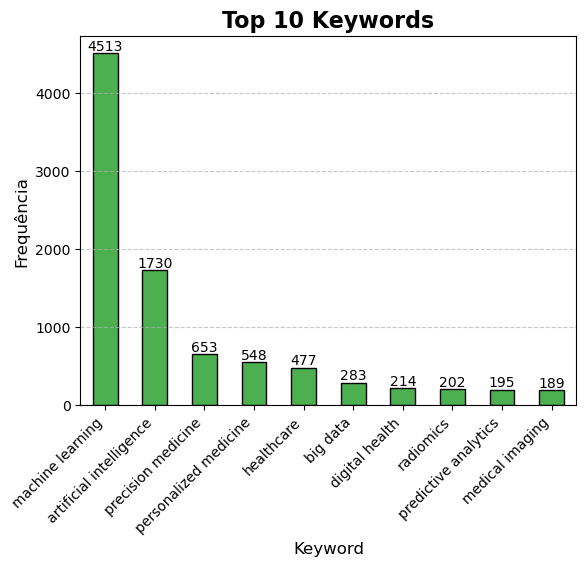

In [234]:
# GRÁFICO COM TOP 10 KEYWORDS: 
plt.figure(figsize=(12, 7))
top_keywords.set_index('Keyword').plot(kind='bar', color='#4CAF50', edgecolor='black', legend=False)
plt.title("Top 10 Keywords", fontsize=16, fontweight='bold')
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de frequência no topo de cada barra
for index, value in enumerate(top_keywords['Count']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

In [236]:
#TIPO DE DOCUMENTOS MAIS FREQUENTES:
df['Document Type'] = df['Document Type'].fillna('')
all_keywords = df['Document Type'].str.split('; ').explode().value_counts().head(10)
print("Type of Documents:")
print(all_keywords)

Type of Documents:
Document Type
Article              3897
Review               1952
Conference paper     1906
Book chapter          566
Editorial             470
Note                  223
Letter                113
Book                   86
Conference review      60
Short survey           49
Name: count, dtype: int64


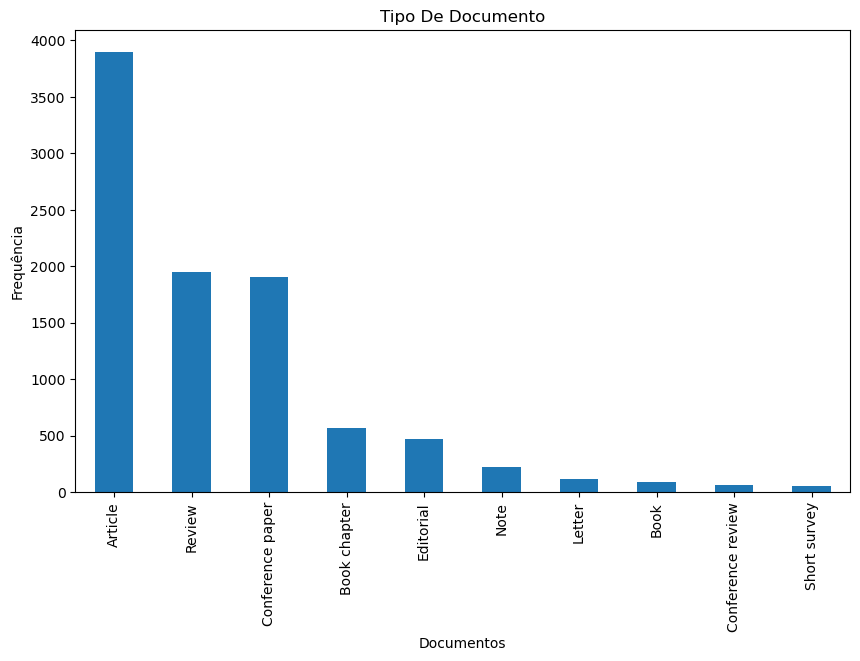

In [240]:
#GRÁFICO TOP 10 TIPO DE DOCUMENTO:
plt.figure(figsize=(10, 6))
all_keywords.plot(kind='bar', title='Tipo De Documento')
plt.xlabel("Documentos")
plt.ylabel("Frequência")
plt.show()

In [242]:
# PRINCIPAIS SPOUNSERS:
top_sponsors = df['Sponsors'].value_counts().head(10)
print("Principais Spousers:\n", top_sponsors)


Principais Spousers:
 Sponsors
CVF; IEEE Computer Society                                                                                                                                                                                                                                                                           25
IEEE                                                                                                                                                                                                                                                                                                 21
The Society of Photo-Optical Instrumentation Engineers (SPIE)                                                                                                                                                                                                                                        15
IEEE UP Section                                                                  

In [244]:
# FONTES DE FINANCIAMENTO MAIS COMUNS: 
funding_sources = df['Funding Details'].value_counts().head(10)
print("Principais Fontes de Financiamento:\n", funding_sources)


Principais Fontes de Financiamento:
 Funding Details
Ministero della Salute                                                                            8
University of Manitoba, UM; Natural Sciences and Engineering Research Council of Canada, NSERC    6
Qatar National Library, QNL                                                                       5
National Institutes of Health, NIH                                                                5
Pfizer                                                                                            5
International Business Machines Corporation, IBM                                                  4
Mitacs                                                                                            4
University of Piraeus Research Center                                                             3
Natural Sciences and Engineering Research Council of Canada, NSERC                                3
AstraZeneca                                    

<h1> Parte II: Machine Learning </h1>

## Análise de Clusters
A técnica de análise de clusters pode ser útil. Com o clustering, podemos identificar grupos de temas de pesquisa, perfis de autores, e impacto ao longo do tempo (tendo em conta citações). Podemos também agrupar os artigos em clusters com base nas keywords e no número de citações.

## 2.1 Clusters - Avaliar/Analisar o Impacto (Nº Citações) ao Longo do Tempo
O objetivo desta análise é identificar padrões de impacto ao longo do tempo nas publicações com base em três variáveis principais:
1) Nº de Citações - representa o impacto das publicações
2) Ano de publicação
3) Open-Access (como a disponibilidade do acesso afeta o nº citações).
A análise busca verificar se existem clusters significativos que agrupem publicações de características semelhantes, permitindo identificar tendências no impacto e seu comportamento ao longo do tempo.


For k=2, the silhouette score is 0.9559405854551007
For k=3, the silhouette score is 0.8773791149807272
For k=4, the silhouette score is 0.8535609712280785
For k=5, the silhouette score is 0.7908544512662732
For k=6, the silhouette score is 0.7187160224792059
For k=7, the silhouette score is 0.715976405713106
For k=8, the silhouette score is 0.7031784764464953
For k=9, the silhouette score is 0.6509652108818619


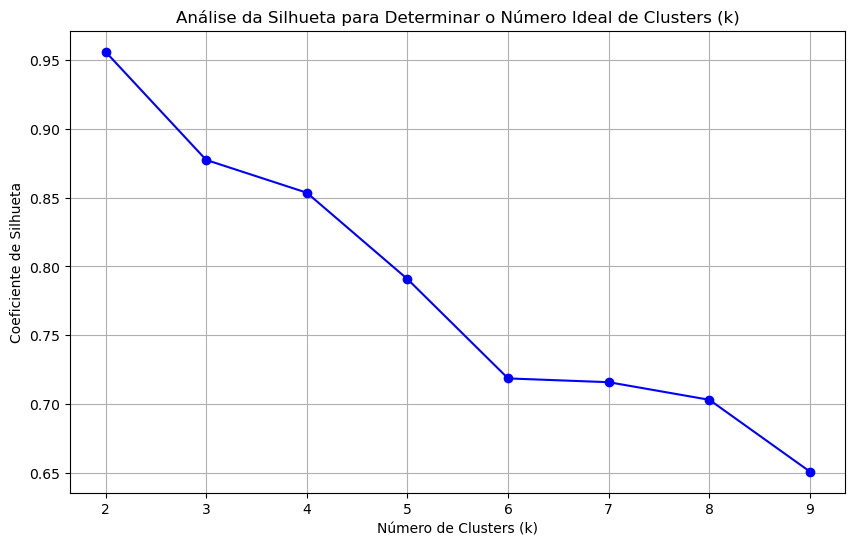

In [254]:
#COMO ESTAMOS A UTILIZAR O K-MEANS E TEMOS QUE ESCOLHER O Nº DE CLUSTERS PRÉVIAMENTE, VAMOS FAZER UM GRÁFICO SILHUETA:

# Seleção das variáveis de interesse e remoção de valores ausentes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X_impact_time = df[['Cited by', 'Year', 'Open Access']].dropna()
X_impact_time['Open Access'] = X_impact_time['Open Access'].apply(lambda x: 1 if x == 'All Open Access' else 0)
silhouette_scores = []
k_values = range(2, 10)  # Testando k de 2 a 9 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_impact_time)
    silhouette_avg = silhouette_score(X_impact_time, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, the silhouette score is {silhouette_avg}")
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Análise da Silhueta para Determinar o Número Ideal de Clusters (k)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silhueta")
plt.grid(True)
plt.show()

## Conclusão Gráfico Silhueta:
O k com maior coeficiente de silhueta representa a melhor escolha para a formação do k clusters. Neste caso, quando k=2 temos o coeficiente com maior valor, correspondendo a 0.95.
Apartir de k=>5 o coeficiente de silhueta vai diminuindo, caindo para valores inferiores a 0.80, o que indica que a separação de clusters está a tornar-se menos eficaz, conduzindo à possibilidade
de haver observações mal classificadas.


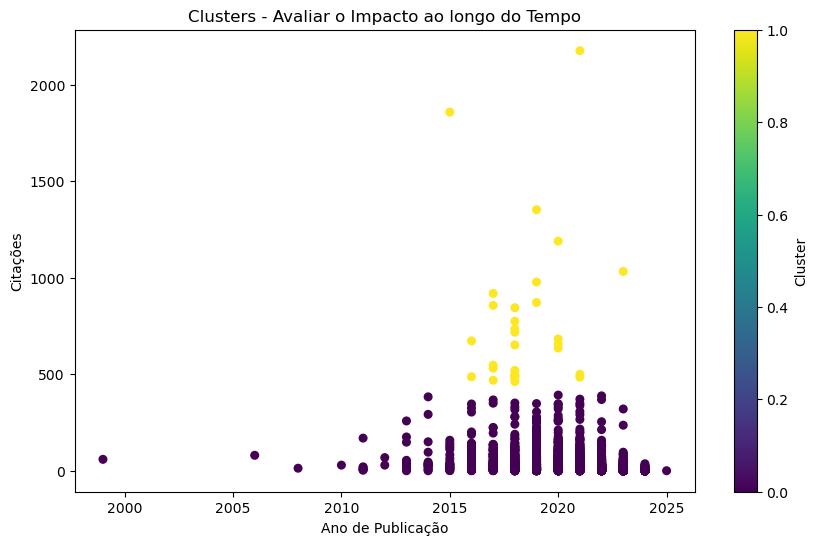

In [258]:
#DE ACORDO COM O QUE RETIRAMOS ANTERIORMENTE VAMOS FAZER COM K=2 E K=3;

#COM K=2
# Seleção das variáveis de interesse e remoção de valores ausentes em 'X_impact_time' e 'df' ao mesmo tempo
X_impact_time = df[['Cited by', 'Year', 'Open Access']].dropna()
df = df.loc[X_impact_time.index]  # Filtrar 'df' para manter apenas os índices sem valores ausentes
# Transformação da variável 'Open Access' para numérica
X_impact_time['Open Access'] = X_impact_time['Open Access'].apply(lambda x: 1 if x == 'All Open Access' else 0)
# Aplicação do K-Means para clustering focado no impacto ao longo do tempo
kmeans_impact_time = KMeans(n_clusters=2, random_state=0)
df['Cluster_Impact_Time'] = kmeans_impact_time.fit_predict(X_impact_time)
plt.figure(figsize=(10, 6))
plt.scatter(X_impact_time['Year'], X_impact_time['Cited by'], c=df['Cluster_Impact_Time'], cmap='viridis', s=30)
plt.title('Clusters - Avaliar o Impacto ao longo do Tempo')
plt.xlabel('Ano de Publicação')
plt.ylabel('Citações')
plt.colorbar(label='Cluster')
plt.show()

## Conclusão Gráfico onde k=2:
Cluster roxo:
Mostra uma tendência no aumento do impacto (devido maior nº de citações) apartir do ano 2015, podendo sugerir uma maior prcora e exploração destas áreas de pesquisa emergentes ou intensificação do interesse em tópicos específicos. 
Caracteriza publicações com menos citações (<500) distribuídas de forma uniforme ao longo dos anos.
No cluster amarelo, este é menos denso e se destaca nas citações mais altas, o que pode estar relacionado que apenas uma minoria das publicações consegue atingir um nível elevado de impacto
Resumindo, há uma clara distinção entre publicações de baixo e alto impacto.
O impacto das publicações aumentou significativamente após 2015, com algumas atingindo mais de 2000 citações.


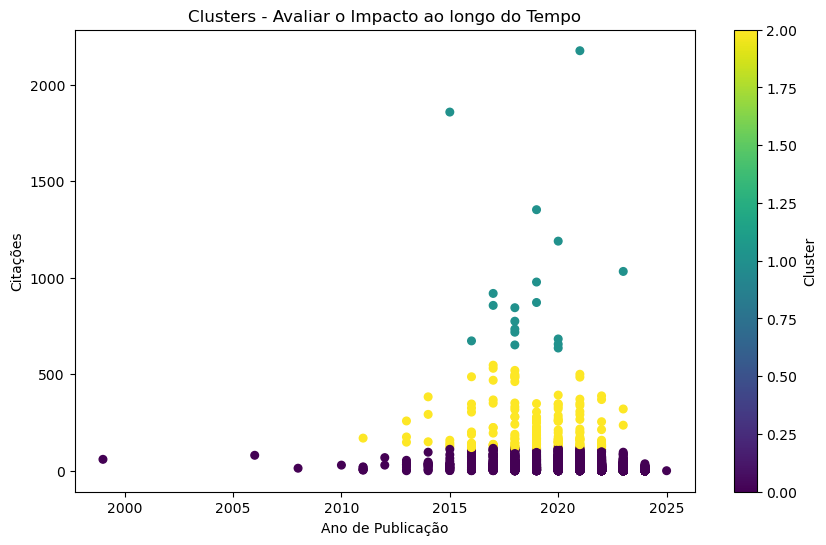

In [264]:
#COM K=3

# Seleção das variáveis de interesse e remoção de valores ausentes em 'X_impact_time' e 'df' ao mesmo tempo
X_impact_time = df[['Cited by', 'Year', 'Open Access']].dropna()
df = df.loc[X_impact_time.index]  # Filtrar 'df' para manter apenas os índices sem valores ausentes
# Transformação da variável 'Open Access' para numérica
X_impact_time['Open Access'] = X_impact_time['Open Access'].apply(lambda x: 1 if x == 'All Open Access' else 0)
# Aplicação do K-Means para clustering focado no impacto ao longo do tempo
kmeans_impact_time = KMeans(n_clusters=3, random_state=0)
df['Cluster_Impact_Time'] = kmeans_impact_time.fit_predict(X_impact_time)
plt.figure(figsize=(10, 6))
plt.scatter(X_impact_time['Year'], X_impact_time['Cited by'], c=df['Cluster_Impact_Time'], cmap='viridis', s=30)
plt.title('Clusters - Avaliar o Impacto ao longo do Tempo')
plt.xlabel('Ano de Publicação')
plt.ylabel('Citações')
plt.colorbar(label='Cluster')
plt.show()


## Conclusão Gráfico onde k=3:
A adição de um terceiro cluster divide ainda mais as publicações:
Cluster roxo: Publicações de baixo impacto (semelhante ao cluster predominante em K=2); Cluster amarelo: Publicações de impacto moderado, com citações entre 500 e 1000.
e por fim, Cluster verde: Publicações de alto impacto (>=1000 citações).
Essa divisão mais granular permite diferenciar melhor o impacto ao longo do tempo.
A visualização com k=3 mostra que as publicações de alto impacto (verde) começaram a aparecer mais frequentemente após 2015
enquanto que o cluster de impacto moderado (amarelo) tem uma concentração relativamente densa entre 2015 e 2020.
